# Artificial Life Substrate Examples and Demo Code

In this notebook we are going to try and make some demo code which shows how different models of Artificial Life work and look at some nice visualisations.

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# See animations in Jupyter notebooks
%matplotlib widget

## Conway's Game of Life

Conway's Game of Life is a cellular automaton where a grid of cells evolves through generations based on simple rules. Each cell can be alive (1) or dead (0), and its state in the next generation depends on its 8 neighbors:

1. A live cell **survives** if it has 2 or 3 neighbors; otherwise, it dies (under/overpopulation).  
2. A dead cell **comes to life** if it has exactly 3 neighbors.  

The rules lead to fascinating patterns and emergent behavior.

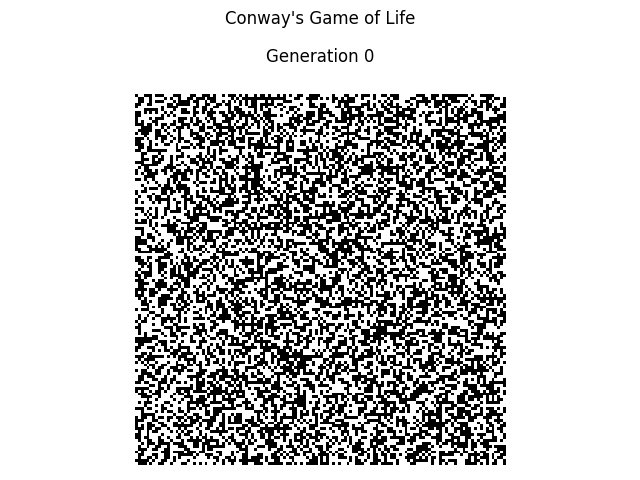

In [2]:
def conway_step(state):
    """
    A single Conway's Game of Life update step.
    - state: 2D jnp.array of 0s and 1s.
    Returns the next generation (same shape as input).
    """
    neighbors = sum(
        jnp.roll(jnp.roll(state, i, axis=0), j, axis=1)
        for i in (-1, 0, 1)
        for j in (-1, 0, 1)
        if not (i == 0 and j == 0)
    )
    # Apply Conway's rules
    return jnp.where(
        (state == 1) & ((neighbors == 2) | (neighbors == 3)), 1,
        jnp.where((state == 0) & (neighbors == 3), 1, 0)
    )

def run_conway(size=64, steps=200, interval=10, random_seed=0):
    """
    Run Conway's Game of Life simulation with adjustable parameters.

    Args:
        size (int): The width/height of the (square) board.
        steps (int): Number of frames (generations) to animate (and then stop).
        interval (int): Delay between frames in milliseconds.
        random_seed (int): Seed for the random initialization.

    Returns:
        ani (matplotlib.animation.FuncAnimation): The animation object.
    """
    rng = jax.random.PRNGKey(random_seed)
    state = jax.random.randint(rng, (size, size), 0, 2)

    fig, ax = plt.subplots()
    fig.suptitle("Conway's Game of Life")
    mat = ax.matshow(state, cmap='binary')
    ax.set_axis_off()
    ax.set_title("Generation 0")
    fig.tight_layout()

    def update(frame):
        nonlocal state
        # Compute the next state
        state = conway_step(state)
        # Update the displayed image data
        mat.set_data(state)
        # Update title
        ax.set_title(f"Generation {frame + 1}")
        return [mat]

    ani = animation.FuncAnimation(
        fig, 
        update, 
        frames=steps,       # Run exactly `steps` frames
        interval=interval,  # Delay between frames in milliseconds
        blit=True,
        repeat=False        # Do not repeat once completed
    )
    return ani

# Example usage
anim = run_conway(size=128, steps=100_000)
plt.show()

## Boids

## Particle Life

## Lenia

## Neural Cellular Automata

## Flow Lenia

## Particle Lenia

## Neural Cellular Automata

## BioMaker CA

## JaxLife

## Evolved Virtual Creatures 

## Polyworld